## Линейная модель

Линейная модель - это математическая модель, используемая в машинном обучении для предсказания значений на основе линейной комбинации входных признаков. Она предполагает, что выходное значение (прогноз) можно выразить как взвешенную сумму входных признаков с добавлением смещения (bias). Математически это можно записать следующим образом:


$\hat{y} = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b$

где:
- $\hat{y}$ - прогнозируемое значение,
- $w_1, w_2, \ldots, w_n$ - веса (параметры) модели для каждого признака,
- $x_1, x_2, \ldots, x_n$ - входные признаки,
- $b$ - смещение (bias).

### Вычисление выхода линейной модели

Для вычисления выхода линейной модели, просто подставьте значения признаков в уравнение, используя соответствующие веса и смещение. Матричная формула для вычисления выхода линейной модели для набора данных \(X\) выглядит следующим образом:

$\hat{Y} = X \cdot \mathbf{w} + b$

где:
- $\hat{Y}$ - вектор прогнозов для всего набора данных,
- $X$ - матрица признаков, где каждая строка представляет один образец, а столбцы - признаки,
- $\mathbf{w}$ - вектор весов модели,
- $b$ - смещение (bias).

### Обучение линейной модели

Обучение линейной модели заключается в настройке параметров (весов и смещения) так, чтобы они наилучшим образом соответствовали обучающим данным. Одним из наиболее распространенных методов обучения линейной модели является градиентный спуск.

### Градиентный спуск

Градиентный спуск - это метод оптимизации, используемый для обновления параметров модели с целью минимизации функции потерь. Функция потерь оценивает, насколько хорошо модель предсказывает реальные значения на обучающих данных.

Для линейной регрессии, часто используется среднеквадратичная ошибка (Mean Squared Error - MSE) в качестве функции потерь:

$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

где:
- $N$ - количество обучающих примеров,
- $y_i$ - реальное значение для i-го примера,
- $\hat{y}_i$ - прогнозированное значение для i-го примера.

### Корректировка весов модели

Для обновления весов модели в методе градиентного спуска, используется градиент функции потерь по отношению к параметрам модели. Градиент показывает направление наибольшего увеличения функции потерь, поэтому мы двигаемся в противоположном направлении градиента, чтобы уменьшить потери. Формула для обновления весов выглядит следующим образом:

$\mathbf{w}_{\text{новые}} = \mathbf{w}_{\text{старые}} - \text{learning_rate} \cdot \nabla L$

где:
- $\mathbf{w}_{\text{новые}}$ - новые веса после обновления,
- $\mathbf{w}_{\text{старые}}$ - текущие веса,
- $\text{learning_rate}$ - скорость обучения (коэффициент, контролирующий размер шага градиентного спуска),
- $\nabla L$ - градиент функции потерь по параметрам модели.

Этот процесс повторяется до достижения сходимости или определенного числа итераций.

## Классификатор на линейной модели

На линейной модели можно построить и классификатор. Для этого нужно выход линейной модели отбразить в интервал от 0 до 1. В этом нам поможет логистическая функция:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

Для обучения скорректируем функцию потерь. Нетрудно показать, что функция, называемая кросс-энтропией на самом деле соответствует максимизации правдоподобия (кстати, почитайте про правдоподобие), ниже представлено выражение для нее

$BCE = -\frac{1}{N} \sum_{i=1}^{N} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$

где:
- $N$ - количество обучающих примеров,
- $y_i$ - истинная метка класса (0 или 1) для i-го примера,
- $\hat{y}_i$ - вероятность принадлежности к классу 1 для i-го примера (выход сигмоидной функции).

Будем считать, что модель относит объект к 1 классу, если ее выход $>=0.5$, иначе - 0 класс.

## Как считать градиенты

Приведу градиент для кросс-энтропии:

$\nabla_{\mathbf{w}} \text{BCE} = -\frac{1}{N} \mathbf{X}^T (\mathbf{y} - \hat{\mathbf{y}})$

Для MSE вычислить градиент самостоятельно

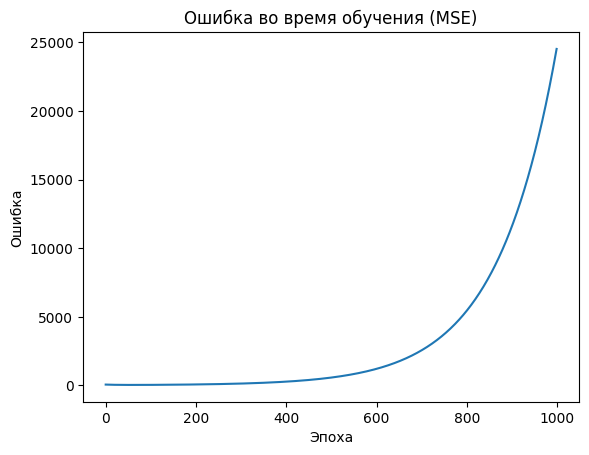

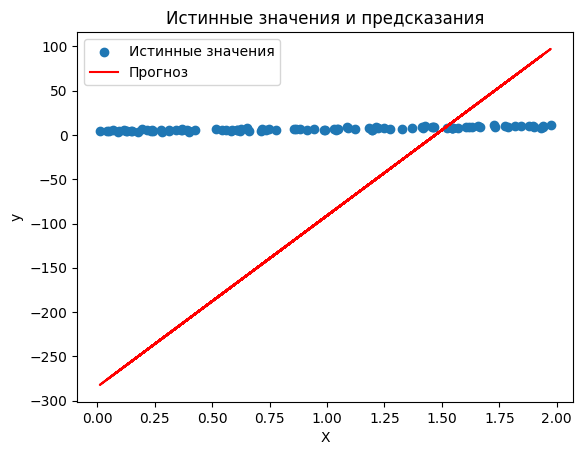

ROC-AUC: 0.860576923076923
Precision: 0.84
Recall: 0.875
F1 Score: 0.8571428571428571


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Основная линейная модель
class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros(num_features)  # Инициализация весов нулями
        self.bias = 0  # Инициализация смещения

    def __call__(self, X):
        # Линейная комбинация признаков и весов с добавлением смещения
        return np.dot(X, self.weights) + self.bias

# Линейная регрессия
class LinearRegressor(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        error_history = []
        N = len(y)  # Количество примеров
        for _ in range(epochs):
            predictions = self(X)  # Линейное предсказание
            error = y - predictions  # Ошибка
            
            # Градиенты для MSE
            gradient = -2 * np.dot(X.T, error) / N
            gradient = np.squeeze(gradient)  # Убираем лишние оси, если есть
            self.weights -= learning_rate * gradient  # Обновление весов
            self.bias -= learning_rate * np.mean(error)  # Обновление смещения

            # Текущая ошибка (MSE)
            current_error = np.mean(error ** 2)
            error_history.append(current_error)

        return error_history

    def predict(self, X):
        return self(X)  # Линейное предсказание

# Пример использования для регрессии
if __name__ == "__main__":
    # Генерация данных
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)
    y = y.flatten()  # Упрощение целевой переменной до одномерного массива

    # Обучение линейной регрессии
    model = LinearRegressor(num_features=X.shape[1])
    errors = model.fit(X, y, learning_rate=0.01, epochs=1000)

    # Визуализация ошибок во время обучения
    plt.plot(errors)
    plt.title("Ошибка во время обучения (MSE)")
    plt.xlabel("Эпоха")
    plt.ylabel("Ошибка")
    plt.show()

    # Предсказание
    y_pred = model.predict(X)

    # Визуализация истинных значений и прогнозов
    plt.scatter(X, y, label="Истинные значения")
    plt.plot(X, y_pred, color='red', label="Прогноз")
    plt.title("Истинные значения и предсказания")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    # Применение модели для классификации (например, на основе предсказанных значений)
    # Определим, что значение больше некоторого порога является "положительным" классом
    threshold = np.mean(y_pred)  # Пороговое значение
    y_class_pred = (y_pred >= threshold).astype(int)  # Классификационное предсказание

    # Генерация истинных меток для примера (нужно заменить на реальные данные)
    y_true = (y >= np.mean(y)).astype(int)  # Создание истинных меток

    # Вычисление метрик
    roc_auc = roc_auc_score(y_true, y_class_pred)
    precision = precision_score(y_true, y_class_pred)
    recall = recall_score(y_true, y_class_pred)
    f1 = f1_score(y_true, y_class_pred)

    # Печать метрик
    print('ROC-AUC:', roc_auc)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)




## Проверьте модели на данных

### Линейная модель

#### Description:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

#### Variables:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

#### Target Variable:

- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [4]:
import pandas as pd

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Загрузка данных
data = pd.read_csv('Student_Performance.csv')

# Просмотр первых строк
print(data.head())

# Выделение целевой переменной (Performance Index)
Y = data['Performance Index']

# Выделение признаков (X)
X = data.drop('Performance Index', axis=1)

# Замена категориальных значений 'Extracurricular Activities' на числовые
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

# Преобразование признаков X в массив numpy
X = X.to_numpy()

# Бинаризация целевой переменной для метрик
# Предположим, что индекс производительности больше 50 - это "успешный" класс
Y_binary = (Y > 50).astype(int)  # Бинаризация целевой переменной

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_binary, test_size=0.2, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000)  # Увеличение числа итераций для сходимости
model.fit(X_train, Y_train)

# Предсказание вероятностей и меток классов
Y_pred_prob = model.predict_proba(X_test)[:, 1]  # Вероятности положительного класса
Y_pred = model.predict(X_test)  # Предсказанные метки классов

# Вычисление метрик
roc_auc = roc_auc_score(Y_test, Y_pred_prob)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Вывод результатов
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
ROC-AUC: 1.00
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


C:\Users\OneLoveArt\AppData\Local\Temp\ipykernel_6868\1029837136.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Загрузка данных
data = pd.read_csv('Student_Performance.csv')

# Преобразование целевой переменной (Performance Index) в бинарную
threshold = 50  # Задайте подходящий порог
Y = (data['Performance Index'] > threshold).astype(int)  # 1, если выше порога, иначе 0

# Выделение признаков (X)
X = data.drop('Performance Index', axis=1)

# Замена категориальных значений 'Extracurricular Activities' на числовые
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

# Преобразование признаков X в массив numpy
X = X.to_numpy()

# Нормализация данных
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
normalized_X = (X - mean) / std

# Нормализация выходных данных Y (если необходимо)
mean_Y = np.mean(Y)
std_Y = np.std(Y)
normalized_Y = (Y - mean_Y) / std_Y  # Для Y это может быть не обязательно, но добавлено по вашему запросу

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(normalized_X, Y, test_size=0.2, random_state=42)

# Обучение логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Предсказание на тестовых данных
Y_pred_prob = model.predict_proba(X_test)[:, 1]  # Вероятности положительного класса
Y_pred = model.predict(X_test)  # Предсказанные метки классов

# Вычисление метрик
roc_auc = roc_auc_score(Y_test, Y_pred_prob)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
f1 = f1_score(Y_test, Y_pred, zero_division=0)

# Вывод нормализованных данных
print("Normalized X:", normalized_X)
print("Normalized Y:", normalized_Y)

# Вывод метрик
print("ROC-AUC: ", roc_auc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


Normalized X: [[ 0.77518771  1.70417565  1.01045465  1.45620461 -1.24975394]
 [-0.38348058  0.72391268 -0.98965352 -1.49229423 -0.90098215]
 [ 1.16141048 -1.06362569  1.01045465  0.27680507 -0.90098215]
 ...
 [ 0.38896495  0.7815752   1.01045465  0.86650484  0.1453332 ]
 [ 1.54763324  1.5888506   1.01045465  0.27680507 -1.59852572]
 [ 0.77518771  0.26261245 -0.98965352  0.86650484 -1.24975394]]
Normalized Y: 0       0.860783
1       0.860783
2      -1.161733
3      -1.161733
4       0.860783
          ...   
9995   -1.161733
9996    0.860783
9997    0.860783
9998    0.860783
9999    0.860783
Name: Performance Index, Length: 10000, dtype: float64
ROC-AUC:  0.9973142751241288
Precision:  0.9709507042253521
Recall:  0.972663139329806
F1 Score:  0.9718061674008811


C:\Users\OneLoveArt\AppData\Local\Temp\ipykernel_6868\847596383.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})


In [11]:
# Определяем количество признаков
num_features = X.shape[1]  # Количество столбцов в X

# Инициализация модели линейной регрессии
lr = LinearRegressor(num_features=num_features)

# Обучение модели на нормализованных данных
history = lr.fit(normalized_X, normalized_Y)


C:\Users\OneLoveArt\AppData\Local\Temp\ipykernel_6868\2887152499.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})


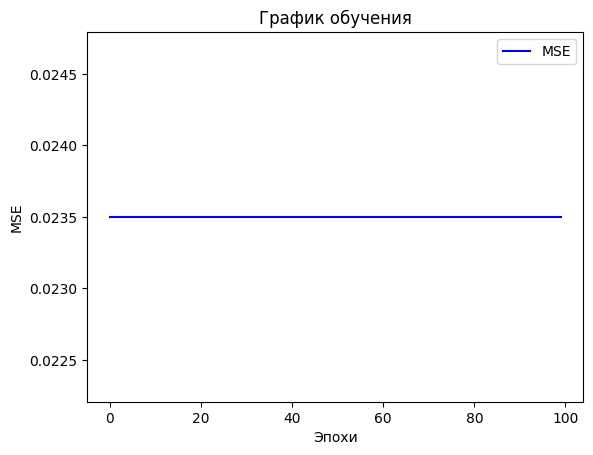

ROC-AUC:  0.9973142751241288
Precision:  0.9709507042253521
Recall:  0.972663139329806
F1 Score:  0.9718061674008811


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Загрузка данных
data = pd.read_csv('Student_Performance.csv')

# Преобразование целевой переменной (Performance Index) в бинарную
threshold = 50  # Задайте подходящий порог
Y = (data['Performance Index'] > threshold).astype(int)  # 1, если выше порога, иначе 0

# Выделение признаков (X)
X = data.drop('Performance Index', axis=1)

# Замена категориальных значений 'Extracurricular Activities' на числовые
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

# Преобразование признаков X в массив numpy
X = X.to_numpy()

# Нормализация данных
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
normalized_X = (X - mean) / std

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(normalized_X, Y, test_size=0.2, random_state=42)

# Обучение логистической регрессии и хранение истории ошибок
model = LogisticRegression(max_iter=1000)

# Инициализация списка для хранения MSE на каждой эпохе
history = []

# Функция для обучения модели с отображением ошибок
def train_model(model, X_train, Y_train, learning_rate=0.01, epochs=100):
    N = len(Y_train)  # Количество примеров
    for epoch in range(epochs):
        model.fit(X_train, Y_train)
        predictions = model.predict(X_train)  # Предсказание
        mse = np.mean((Y_train - predictions) ** 2)  # Ошибка MSE
        history.append(mse)

# Обучение модели
train_model(model, X_train, Y_train, epochs=100)

# Предсказание на тестовых данных
Y_pred_prob = model.predict_proba(X_test)[:, 1]  # Вероятности положительного класса
Y_pred = model.predict(X_test)  # Предсказанные метки классов

# Вычисление метрик
roc_auc = roc_auc_score(Y_test, Y_pred_prob)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
f1 = f1_score(Y_test, Y_pred, zero_division=0)

# Построение графика обучения
plt.plot(history, 'b', label='MSE')  # 'b' означает синий цвет линии
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()

# Отображение графика
plt.show()

# Вывод метрик
print("ROC-AUC: ", roc_auc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


### Классификатор
#### Context
When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision."

"If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank."

The predictors that may potentially have any influence on Creditability:

Account Balance: No account (1), None (No balance) (2), Some Balance (3)

Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)

Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM

Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7

Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female

No of Credits at this bank: 1, More than 1

Guarantor: None, Yes

Concurrent Credits: Other Banks or Dept Stores, None

ForeignWorker variable may be dropped from the study

Purpose of Credit: New car, Used car, Home Related, Other

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Загрузка данных из CSV файла
data = pd.read_csv('german.csv', sep=';')

# Просмотр первых строк данных
print(data.head())

# Предполагаем, что целевая переменная называется 'Creditability'
Y = data['Creditability']  # Целевая переменная

# Признаки (все остальные столбцы, кроме целевой переменной)
X = data.drop('Creditability', axis=1)

# Дополнительно: Если необходимо, можно удалить столбец 'ForeignWorker'
X = X.drop('ForeignWorker', axis=1, errors='ignore')  # 'errors="ignore"' предотвращает ошибку, если столбца нет

# Вывод информации о данных
print("Features:\n", X.head())
print("Target:\n", Y.head())

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Обучение логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Предсказание на тестовых данных
Y_pred_prob = model.predict_proba(X_test)[:, 1]  # Вероятности положительного класса
Y_pred = model.predict(X_test)  # Предсказанные метки классов

# Вычисление метрик
roc_auc = roc_auc_score(Y_test, Y_pred_prob)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Вывод метрик
print("ROC-AUC: ", roc_auc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

c:\Users\OneLoveArt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print(data.describe())

       Creditability  Account_Balance  Duration_of_Credit_monthly  \
count    1000.000000      1000.000000                 1000.000000   
mean        0.700000         2.577000                   20.903000   
std         0.458487         1.257638                   12.058814   
min         0.000000         1.000000                    4.000000   
25%         0.000000         1.000000                   12.000000   
50%         1.000000         2.000000                   18.000000   
75%         1.000000         4.000000                   24.000000   
max         1.000000         4.000000                   72.000000   

       Payment_Status_of_Previous_Credit      Purpose  Credit_Amount  \
count                         1000.00000  1000.000000     1000.00000   
mean                             2.54500     2.828000     3271.24800   
std                              1.08312     2.744439     2822.75176   
min                              0.00000     0.000000      250.00000   
25%               

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Загрузка данных из CSV файла
data = pd.read_csv('german.csv', sep=';')

# Просмотр первых строк данных
print(data.head())

# Предполагаем, что целевая переменная называется 'Creditability'
Y = data['Creditability']  # Целевая переменная

# Признаки (все остальные столбцы, кроме целевой переменной)
X = data.drop('Creditability', axis=1)

# Дополнительно: Если необходимо, можно удалить столбец 'ForeignWorker'
X = X.drop('ForeignWorker', axis=1, errors='ignore')  # 'errors="ignore"' предотвращает ошибку, если столбца нет

# Вычислите среднее по столбцам
mean = X.mean(axis=0)

# Вычислите стандартное отклонение по столбцам
std = X.std(axis=0)

# Нормализуйте данные по столбцам (стандартное масштабирование)
normalized_X = (X - mean) / std

# Вывод результатов
print("Среднее по столбцам:\n", mean)
print("Стандартное отклонение по столбцам:\n", std)
print("Нормализованные данные:\n", normalized_X.head())

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(normalized_X, Y, test_size=0.2, random_state=42)

# Обучение логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Предсказание на тестовых данных
Y_pred_prob = model.predict_proba(X_test)[:, 1]  # Вероятности положительного класса
Y_pred = model.predict(X_test)  # Предсказанные метки классов

# Вычисление метрик
roc_auc = roc_auc_score(Y_test, Y_pred_prob)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Вывод метрик
print("ROC-AUC: ", roc_auc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

In [16]:
# Определяем количество признаков
num_features = normalized_X.shape[1]  # Количество столбцов в нормализованных данных

# Инициализация модели линейного классификатора
lc = LinearClassifier(num_features=num_features)

# Обучение модели на нормализованных данных
history = lc.fit(normalized_X, Y)  # Y — целевая переменная

# Вывод истории ошибок (например, если хотите посмотреть на результат)
print("История ошибок:", history)


История ошибок: [np.float64(0.6931471805599454), np.float64(0.6927995896801851), np.float64(0.6924602312033069), np.float64(0.6921290591214015), np.float64(0.6918060278193429), np.float64(0.6914910920759807), np.float64(0.691184207065214), np.float64(0.6908853283569476), np.float64(0.6905944119179356), np.float64(0.6903114141125097), np.float64(0.6900362917032038), np.float64(0.6897690018512661), np.float64(0.6895095021170707), np.float64(0.6892577504604266), np.float64(0.689013705240786), np.float64(0.6887773252173581), np.float64(0.6885485695491268), np.float64(0.6883273977947763), np.float64(0.6881137699125287), np.float64(0.6879076462598928), np.float64(0.6877089875933289), np.float64(0.6875177550678304), np.float64(0.6873339102364264), np.float64(0.6871574150496049), np.float64(0.6869882318546611), np.float64(0.686826323394973), np.float64(0.6866716528092038), np.float64(0.6865241836304374), np.float64(0.6863838797852454), np.float64(0.6862507055926904), np.float64(0.6861246257632

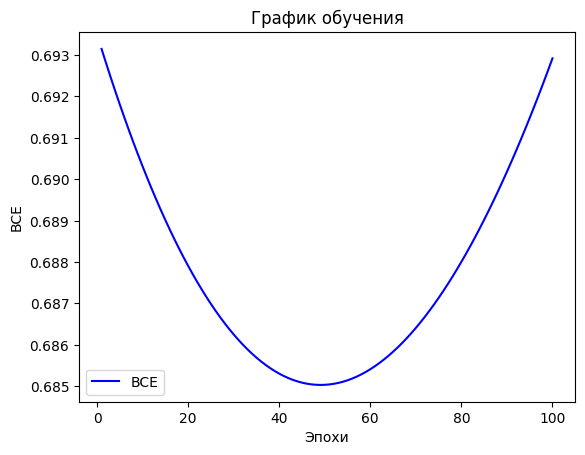

In [17]:
import matplotlib.pyplot as plt

# Определение количества эпох
epochs = range(1, len(history) + 1)

# Построение графика обучения
plt.plot(epochs, history, 'b', label='BCE')  # 'b' означает синий цвет линии
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('BCE')  # BCE - Binary Cross-Entropy
plt.legend()

# Отображение графика
plt.show()


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Загрузка данных из CSV файла
data = pd.read_csv('german.csv', sep=';')

# Просмотр первых строк данных
print(data.head())

# Предполагаем, что целевая переменная называется 'Creditability'
Y = data['Creditability']  # Целевая переменная

# Признаки (все остальные столбцы, кроме целевой переменной)
X = data.drop('Creditability', axis=1)

# Дополнительно: Если необходимо, можно удалить столбец 'ForeignWorker'
X = X.drop('ForeignWorker', axis=1, errors='ignore')  # 'errors="ignore"' предотвращает ошибку, если столбца нет

# Вычислите среднее по столбцам
mean = X.mean(axis=0)

# Вычислите стандартное отклонение по столбцам
std = X.std(axis=0)

# Нормализуйте данные по столбцам (стандартное масштабирование)
normalized_X = (X - mean) / std

# Вывод результатов
print("Среднее по столбцам:\n", mean)
print("Стандартное отклонение по столбцам:\n", std)
print("Нормализованные данные:\n", normalized_X.head())

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(normalized_X, Y, test_size=0.2, random_state=42)

# Обучение логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Предсказание на тестовых данных
Y_pred_prob = model.predict_proba(X_test)[:, 1]  # Вероятности положительного класса
Y_pred = model.predict(X_test)  # Предсказанные метки классов

# Вычисление метрик
roc_auc = roc_auc_score(Y_test, Y_pred_prob)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Вывод метрик
print("ROC-AUC: ", roc_auc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# Предсказания на нормализованных данных
pred = model.predict(normalized_X)

# Вычисление точности
accuracy = (pred == Y).sum() / len(Y)

# Вывод точности
print('Accuracy: ', accuracy * 100, '%')


   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

Вычислите для этой модели ROC-AUC, precision, recall и f1